In [7]:
!pip install PySastrawi

     |████████████████████████████████| 210 kB 11.5 MB/s 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv("/content/drive/MyDrive/Research /PDP Indopol 2021/Dataset/majority.csv")

In [3]:

a['majority'] = [int(i) for i in a['majority']]

In [4]:
a = a.replace(-1, 2)
a['majority'].value_counts()

0    723
1    618
2    255
Name: majority, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3d838978d0>,
 [Text(0.1618051010752996, 1.088034516578409, 'Netral'),
  Text(-0.6653349059840541, -0.8759734373137065, 'Positif'),
  Text(0.9643126766983466, -0.5292457477947936, 'Negatif')],
 [Text(0.08825732785925433, 0.5934733726791321, '45%'),
  Text(-0.36290994871857496, -0.4778036930802035, '39%'),
  Text(0.5259887327445526, -0.28867949879716015, '16%')])

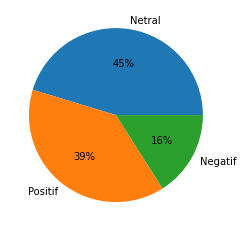

In [ ]:
plt.pie(a['majority'].value_counts(), labels=['Netral','Positif','Negatif'], autopct='%1.0f%%')

In [5]:
selected = a[['id','tweet','majority']]
selected.rename(columns={'majority':'label'})

,id,tweet,label
0,4339,"Today bokap nyokap daftar vaksin di dkt rumah,...",2
1,6274,Saya sumbang kamu vaksin yaaa... tapi nanti k...,2
2,816,"""Vaksin berbayar itu tidak etis, di tengah pan...",2
3,107,"kalo ada yg blng, ""biar seimbang sma yg udh va...",0
4,1572,"Semoga selalu menjadi terang dunia, dan kita k...",1
...,...,...,...
1591,58059,Ni vaksin edan kerasnya ðŸ˜Ÿ,0
1592,58042,Besok vaksin ðŸ˜‚,1
1593,58043,Ternyata anak bapil lebih rungsingin emaknga k...,0
1594,58101,Lagi ngumpulin nyali buat vaksin kedua besok ðŸ¤£,1


In [8]:
import re
import nltk
#nltk.download()
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary


def preproc(tweet):
  tweet = re.sub('[0-9\n]',' ',tweet)
  #Lower case
  tweet.lower()
  #convert any url to URL
  tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
  #Convert any @Username to "AT_USER"
  tweet = re.sub('@[^\s]+','AT_USER',tweet)
  #Remove additional white spaces
  tweet = re.sub('[\s]+', ' ', tweet)
  tweet = re.sub('[\n]+', ' ', tweet)
  #Remove not alphanumeric symbols white spaces
  tweet = re.sub(r'[^\w]', ' ', tweet)
  tweet = re.sub(r'[^a-zA-Z]+', ' ', tweet)
  
  #Replace #word with word
  tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
  #Remove :( or :)
  tweet = tweet.replace(':)','')
  tweet = tweet.replace(':(','')
  #trim
  tweet = tweet.strip('\'"')

#alternatif, lainnya bisa coba NLTK comment this block if not necessary
  stfactory = StemmerFactory()
  stemmer= stfactory.create_stemmer()
  #factory = StopWordRemoverFactory()
  # Ambil Stopword bawaan
  stop_factory = StopWordRemoverFactory().get_stop_words()
  more_stopword = ['vaksin','di','yg','bgt','gw','lg','dr','eh','si','jd','ndk','ga','gak','aja','tp','utk','wkwk','vaksinasi','covid','krn','org','rt'] #PERLU TAMBAHAN STOPWORDS BERUPA 'VAKSIN' , Singkatan2, etc.
 
  # Merge stopword
  data = stop_factory + more_stopword
 
  dictionary = ArrayDictionary(data)
  stopword = StopWordRemover(dictionary)

  
  #data = factory.get_stop_words() + more_stopword
  #stopword = factory.create_stop_word_remover()
  tweet = stopword.remove(tweet)
  tweet = stemmer.stem(tweet)




  return tweet



In [9]:
c = []
for a in selected['tweet']:
  
  b = preproc(str(a))
  c.append(b)

selected['tweet'] = c

In [10]:
selected = selected.rename(columns={'majority':'label'})
pos = selected.loc[selected['label'] == 1]
neg = selected.loc[selected['label'] == 2]
net = selected.loc[selected['label'] == 0]


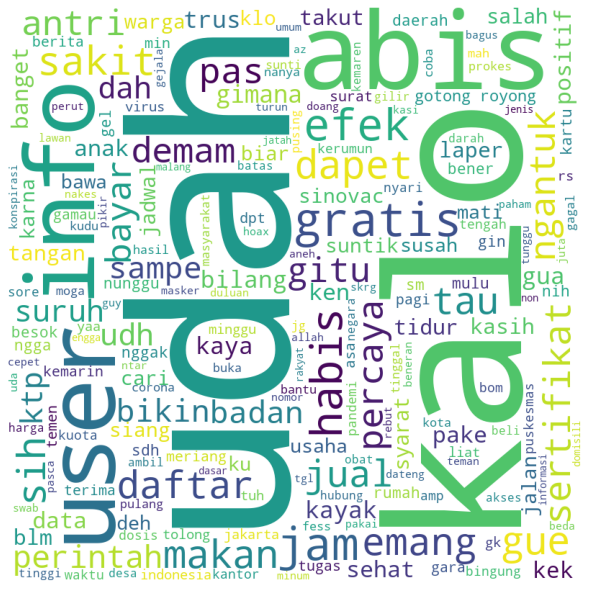

In [28]:
#descriptive wc
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 

#in textstem  
# iterate through the csv file 
for val in net['tweet']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
pos

,id,tweet,label
4,1572,Semoga selalu menjadi terang dunia dan kita ka...,1
6,4218,Semoga Vaksin Anak Usia tahun terus diperluas ...,1
7,975,Rasanya pengen jadi konglomerat biar bisa ngeb...,1
13,6415,Kalo gamau bayar buat vaksin ya gaperlu repot ...,1
20,77,Gue dan bapak vaksin sinovac Yes it works Vaks...,1
...,...,...,...
1586,57949,Vaksin ke,1
1590,57988,vaksin dosis ke efek pegel pegelnya baru dimul...,1
1592,58042,Besok vaksin,1
1594,58101,Lagi ngumpulin nyali buat vaksin kedua besok,1


In [11]:
#baseline
#tfidf vector

textstem = selected['tweet']
tags = selected['label']

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer 
from sklearn.model_selection import cross_val_score
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
wcvec=cv.fit_transform(textstem)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(wcvec)

countvec = cv.transform(textstem)
tf_idf_vector=tfidf_transformer.transform(countvec)


In [13]:
#baseline random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
#rf.fit(tf_idf_vector,tags)
scores = cross_val_score(rf,tf_idf_vector,tags,cv=5)
print(scores)
scores.mean()

[0.55       0.55799373 0.5830721  0.55172414 0.54231975]


0.5570219435736677

In [36]:
#baseline naivebayes

from sklearn.naive_bayes import MultinomialNB

nbc = MultinomialNB()
scores = cross_val_score(nbc,tf_idf_vector,tags,cv=5)
print(scores)
scores.mean()

[0.565625   0.52978056 0.59874608 0.59247649 0.59874608]


0.5770748432601881

In [39]:
import xgboost as xgb
def createxg():
  clf = xgb.XGBClassifier()
  return clf

xbost = createxg()
scores = cross_val_score(xbost,tf_idf_vector,tags,cv=5)
print(scores)
scores.mean()

[0.525      0.52978056 0.56739812 0.53918495 0.53291536]


0.5388557993730407

In [ ]:
#GRIDSEARCH

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'max_features': [5,10,12,17,25],
    'max_depth': [5,10,20,None],
    'n_estimators': [250,300,400,500]
}

cv = GridSearchCV(rf,parameters)
cv.fit(tf_idf_vector,tags)
print_results(cv)